In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [4]:
#1. Load Dataset
df = pd.read_csv("/home/abhi/Desktop/DataScience/car.csv")
print("Columns in dataset:\n", df.columns)

Columns in dataset:
 Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


In [17]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [5]:
#2. Check missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [6]:
# Correct column names (change according to actual dataset)
categorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission']

In [7]:
# 3. Encode categorical columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("\nEncoded Sample:\n", df.head())



Encoded Sample:
   Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          2   
1      sx4  2013           4.75           9.54       43000          1   
2     ciaz  2017           7.25           9.85        6900          2   
3  wagon r  2011           2.85           4.15        5200          2   
4    swift  2014           4.60           6.87       42450          1   

   Selling_type  Transmission  Owner  
0             0             1      0  
1             0             1      0  
2             0             1      0  
3             0             1      0  
4             0             1      0  


In [8]:
# 4. Define Features (Drop Car_Name & Selling_Price)
X = df.drop(columns=["Car_Name", "Selling_Price"])
y = df["Selling_Price"]


In [9]:
# 5. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# 6. Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [12]:
# 7. Predictions
y_pred = model.predict(X_test)
y_pred

array([ 2.96562958,  8.30085782,  6.05782751, -1.46736816,  9.25705687,
        7.03171029,  1.35032876,  0.82691573,  1.36987479,  7.10758777,
        8.74146173,  0.58642748,  8.50459253,  3.42661966,  6.50292735,
        3.08732011,  0.46492161, 10.89305942,  1.76225878,  2.36483065,
        0.37623881,  7.73151022,  6.20981391,  2.65038024,  0.78195056,
        3.72251099,  5.3340761 ,  2.84078903,  2.15815992,  1.77018609,
        0.37934652,  8.79022344, -0.69755203,  2.30364091,  8.21352459,
        4.54034656,  7.35264949,  7.68532992,  2.91820641,  8.08316508,
        4.00325157,  4.35384555,  4.36428366,  0.60942277,  6.94443091,
        0.47315352,  7.41534765, 11.442946  ,  3.14938081,  4.95296902,
        6.86419835,  2.19604944, 20.53785454, 16.78959932,  7.13843807,
        9.82975063,  4.49877206,  8.61930717,  1.81754614,  7.67258754,
        0.21141592])

In [18]:
#  8. Evaluation
print("\n Model Performance:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


 Model Performance:
R² Score: 0.8466902419661776
MAE: 1.221932362175591
RMSE: 1.8792498207990767


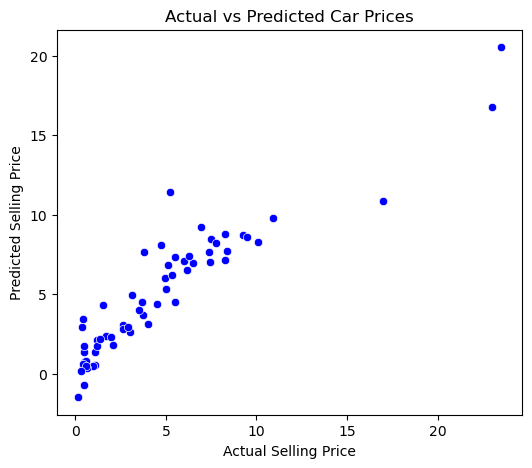

In [14]:
# 9. Scatter Plot (Actual vs Predicted)
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=y_pred, color="blue")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()

In [19]:
# 10. Predict Price for a New Car
sample_car = pd.DataFrame({
    'Year': [2018],
    'Present_Price': [5.59],
    'Driven_kms': [27000],
    'Fuel_Type': [1],  # After encoding
    'Selling_type': [1],  # After encoding
    'Transmission': [0],  # After encoding
    'Owner': [0]
})

pred_price = model.predict(sample_car)[0]
print(f"\n Predicted Price for sample car: {pred_price:.2f} Lakhs")



 Predicted Price for sample car: 7.21 Lakhs
